In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


### 1. Loading Data

In [2]:
# declaring dataframe

sales_item = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/items.csv')
sales_item_category = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv')
sales_shops = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/shops.csv')
sales_train =  pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv', parse_dates=['date'], 
                    dtype={'date': 'str', 'date_block_num': 'int32', 'shop_id': 'int32','item_id': 'int32', 'item_price': 'float32', 'item_cnt_day': 'int32'})
sales_test =  pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/test.csv')


In [3]:
#checking the file

print(sales_item.shape)
print(sales_item_category.shape)
print(sales_shops.shape)
print(sales_train.shape)
print(sales_test.shape)

(22170, 3)
(84, 2)
(60, 2)
(2935849, 6)
(214200, 3)


In [4]:
print("Items : \n",sales_item.head())
print("Item Category : \n",sales_item_category.head())
print("Shops : \n",sales_shops.head())
print("Train : \n",sales_train.head())
print("Test : \n",sales_test.head())

Items : 
                                            item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  
Item Category : 
         item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4
Shops : 
                         shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"       

In [5]:
# checking null value

print("Items : \n",sales_item.isnull().sum())
print("Item Category : \n",sales_item_category.isnull().sum())
print("Shops : \n",sales_shops.isnull().sum())
print("Train : \n",sales_train.isnull().sum())
print("Test : \n",sales_test.isnull().sum())

Items : 
 item_name           0
item_id             0
item_category_id    0
dtype: int64
Item Category : 
 item_category_name    0
item_category_id      0
dtype: int64
Shops : 
 shop_name    0
shop_id      0
dtype: int64
Train : 
 date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
Test : 
 ID         0
shop_id    0
item_id    0
dtype: int64


In [6]:
# duplicate counts in train dataset

print('Duplicates in Train : ',len(sales_train[sales_train.duplicated()]))

Duplicates in Train :  6


In [7]:
sales_train[sales_train.duplicated()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76962,2013-05-01,0,54,20130,149.0,1
1435367,2014-02-23,13,50,3423,999.0,1
1496766,2014-03-23,14,21,3423,999.0,1
1671873,2014-01-05,16,50,3423,999.0,1
1866340,2014-12-07,18,25,3423,999.0,1
2198566,2014-12-31,23,42,21619,499.0,1


In [8]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int32         
 2   shop_id         int32         
 3   item_id         int32         
 4   item_price      float32       
 5   item_cnt_day    int32         
dtypes: datetime64[ns](1), float32(1), int32(4)
memory usage: 78.4 MB


In [9]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.906234e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.726440e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


We are downcasting dataframe to save memories

In [10]:
def datatype_downcast(df):
    float_col= [i for i in df if df[i].dtype == 'float64']
    int_col = [i for i in df if df[i].dtype in ['int64','int32']]
    df[float_col] = df[float_col].astype(np.float32)
    df[int_col] = df[int_col].astype(np.int16)
    return df

sales_train = datatype_downcast(sales_train)

sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int16         
 2   shop_id         int16         
 3   item_id         int16         
 4   item_price      float32       
 5   item_cnt_day    int16         
dtypes: datetime64[ns](1), float32(1), int16(4)
memory usage: 56.0 MB


Joining the dataset sales_train

In [11]:
## Joining the dataset

sales_train_new = sales_train.join(sales_item,on = 'item_id',rsuffix='_').join(sales_shops,on = 'shop_id',rsuffix='_').join(sales_item_category,on = 'item_category_id',rsuffix='_').drop(['item_id_','shop_id_','item_category_id_'],axis=1)

In [12]:
sales_train_new.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
0,2013-02-01,0,59,22154,999.000000,1,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray
1,2013-03-01,0,25,2552,899.000000,1,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
2,2013-05-01,0,25,2552,899.000000,-1,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
3,2013-06-01,0,25,2554,1709.050049,1,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
4,2013-01-15,0,25,2555,1099.000000,1,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства


In [13]:
sales_train_new.head().T

,0,1,2,3,4
date,2013-02-01 00:00:00,2013-03-01 00:00:00,2013-05-01 00:00:00,2013-06-01 00:00:00,2013-01-15 00:00:00
date_block_num,0,0,0,0,0
shop_id,59,25,25,25,25
item_id,22154,2552,2552,2554,2555
item_price,999.0,899.0,899.0,1709.050049,1099.0
item_cnt_day,1,1,-1,1,1
item_name,ЯВЛЕНИЕ 2012 (BD),DEEP PURPLE The House Of Blue Light LP,DEEP PURPLE The House Of Blue Light LP,DEEP PURPLE Who Do You Think We Are LP,DEEP PURPLE 30 Very Best Of 2CD (Фирм.)
item_category_id,37,58,58,58,56
shop_name,"Ярославль ТЦ ""Альтаир""","Москва ТРК ""Атриум""","Москва ТРК ""Атриум""","Москва ТРК ""Атриум""","Москва ТРК ""Атриум"""
item_category_name,Кино - Blu-Ray,Музыка - Винил,Музыка - Винил,Музыка - Винил,Музыка - CD фирменного производства


In [14]:
print('Minimum Date: %s' % sales_train_new['date'].min().date())
print('Maximum Date: %s' % sales_train_new['date'].max().date())

Minimum Date: 2013-01-01
Maximum Date: 2015-12-10


Checking Data Leakage

In [15]:
# checking shopsid and item_id in test

shop_id_test = sales_test['shop_id'].unique()
print("Shop ID : ",shop_id_test)

item_id_test = sales_test['item_id'].unique()
print("Item ID : ",item_id_test)

Shop ID :  [ 5  4  6  3  2  7 10 12 28 31 26 25 22 24 21 15 16 18 14 19 42 50 49 53
 52 47 48 57 58 59 55 56 36 37 35 38 34 46 41 44 39 45]
Item ID :  [ 5037  5320  5233 ... 15757 19648   969]


In [16]:
# checking the shape before leakage

sales_train_new.shape

(2935849, 10)

In [17]:
# removing leakage

sales_train_new = sales_train_new[sales_train_new['shop_id'].isin(shop_id_test)]
sales_train_new = sales_train_new[sales_train_new['item_id'].isin(item_id_test)]

In [18]:
# after removing leakage
sales_train_new.shape

(1224439, 10)

### Step 2 : Data Cleaning

In [19]:
sales_train_new.query('item_price > 0')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
0,2013-02-01,0,59,22154,999.0,1,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray
10,2013-03-01,0,25,2574,399.0,2,DEL REY LANA Born To Die The Paradise Editio...,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
11,2013-05-01,0,25,2574,399.0,1,DEL REY LANA Born To Die The Paradise Editio...,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
12,2013-07-01,0,25,2574,399.0,1,DEL REY LANA Born To Die The Paradise Editio...,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
13,2013-08-01,0,25,2574,399.0,2,DEL REY LANA Born To Die The Paradise Editio...,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.0,1,V/A Nu Jazz Selection (digipack),55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
2935845,2015-09-10,33,25,7460,299.0,1,V/A The Golden Jazz Collection 1 2CD,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
2935846,2015-10-14,33,25,7459,349.0,1,V/A The Best Of The 3 Tenors,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
2935847,2015-10-22,33,25,7440,299.0,1,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,"Москва ТРК ""Атриум""",Музыка - MP3


In [20]:
sales_train_new.query('item_price == 0')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name


In [21]:
sales_train_new = sales_train_new.query('item_price > 0')

In [22]:
sales_train_new.shape

(1224439, 10)

### Step 3 : Data Preprocessing

In [23]:
# Creating month dataframe

sales_monthly = sales_train_new[['date','date_block_num','shop_id','item_id','item_category_id','item_price','item_cnt_day']]

In [24]:
sales_monthly.head()

,date,date_block_num,shop_id,item_id,item_category_id,item_price,item_cnt_day
0,2013-02-01,0,59,22154,37,999.0,1
10,2013-03-01,0,25,2574,55,399.0,2
11,2013-05-01,0,25,2574,55,399.0,1
12,2013-07-01,0,25,2574,55,399.0,1
13,2013-08-01,0,25,2574,55,399.0,2


In [25]:
sales_monthly = sales_monthly.sort_values('date').groupby(['date_block_num','shop_id','item_id','item_category_id'],as_index=False)

In [26]:
sales_monthly = sales_monthly.agg({'item_price':['sum','mean'],'item_cnt_day':['sum','mean','count']})

In [27]:
sales_monthly.columns = ['date_block_num', 'shop_id', 'item_category_id', 'item_id', 'item_price', 'item_price_mean', 'item_cnt', 'item_cnt_mean', 'transactions']

sales_monthly.columns

Index(['date_block_num', 'shop_id', 'item_category_id', 'item_id',
       'item_price', 'item_price_mean', 'item_cnt', 'item_cnt_mean',
       'transactions'],
      dtype='object')

In [28]:
sales_monthly.shape

(600159, 9)

In [29]:
shops_id = sales_monthly['shop_id'].unique()
shops_id

array([ 2,  3,  4,  6,  7, 10, 12, 14, 15, 16, 18, 19, 21, 22, 24, 25, 26,
       28, 31, 35, 37, 38, 41, 42, 44, 45, 46, 47, 50, 52, 53, 56, 59,  5,
       57, 58, 55, 49, 39, 48, 34, 36])

In [30]:
items_id = sales_monthly['item_id'].unique()
items_id

array([37, 73, 67, 55, 19, 21, 28, 30, 23, 75, 22,  2,  5, 35,  6, 38, 40,
       62, 57, 63, 64, 65, 43, 79, 49, 72, 83, 60, 77, 58, 41, 45, 56, 69,
        9, 29, 71, 61, 76, 31, 78, 54, 70, 20,  3, 12, 44, 25, 33, 15, 34,
       24,  7, 16, 11, 26, 47, 42, 74, 36])

In [31]:
new_data = []

for i in range(34):
    for shop in shops_id:
        for item in items_id:
            new_data.append([i,shop,item])
            
new_data = pd.DataFrame(new_data,columns=['date_block_num','shop_id','item_id'])

In [32]:
new_data

,date_block_num,shop_id,item_id
0,0,2,37
1,0,2,73
2,0,2,67
3,0,2,55
4,0,2,19
...,...,...,...
85675,33,36,26
85676,33,36,47
85677,33,36,42
85678,33,36,74


In [33]:
sales_monthly = pd.merge(new_data, sales_monthly, on=['date_block_num','shop_id','item_id'], how='left')
sales_monthly.fillna(0, inplace=True)

In [34]:
sales_monthly.shape

(640887, 9)

In [35]:
sales_monthly.head().T

,0,1,2,3,4
date_block_num,0.0,0.000000,0.000000,0.0,0.0
shop_id,2.0,2.000000,2.000000,2.0,2.0
item_id,37.0,37.000000,37.000000,37.0,37.0
item_category_id,33.0,8094.000000,8095.000000,8958.0,10039.0
item_price,499.0,1068.540039,420.390015,249.5,299.0
item_price_mean,499.0,1068.540039,420.390015,249.5,299.0
item_cnt,1.0,1.000000,1.000000,1.0,1.0
item_cnt_mean,1.0,1.000000,1.000000,1.0,1.0
transactions,1.0,1.000000,1.000000,1.0,1.0


In [36]:
sales_monthly.describe().T

,count,mean,std,min,25%,50%,75%,max
date_block_num,640887.0,19.793332,9.277276,0.0,13.0,21.0,28.0,33.00000
shop_id,640887.0,32.093765,16.933873,2.0,19.0,31.0,47.0,59.00000
item_id,640887.0,42.504320,18.137527,2.0,29.0,40.0,55.0,83.00000
item_category_id,640887.0,9378.441608,6471.761306,0.0,3719.0,8078.0,15217.0,22167.00000
item_price,640887.0,1968.697754,6800.664062,0.0,299.0,600.0,1745.0,515573.59375
item_price_mean,640887.0,852.492798,1531.599854,0.0,229.0,399.0,999.0,42990.00000
item_cnt,640887.0,2.524269,10.944775,-4.0,1.0,1.0,2.0,2253.00000
item_cnt_mean,640887.0,1.022421,1.729875,-2.0,1.0,1.0,1.0,1000.00000
transactions,640887.0,1.910538,2.301848,0.0,1.0,1.0,2.0,31.00000


In [37]:
sales_monthly['sales_year'] = sales_monthly['date_block_num'].apply(lambda x: ((x//12) + 2013))
sales_monthly['sales_month'] = sales_monthly['date_block_num'].apply(lambda x: (x % 12))

In [38]:
sales_monthly.head().T

,0,1,2,3,4
date_block_num,0.0,0.000000,0.000000,0.0,0.0
shop_id,2.0,2.000000,2.000000,2.0,2.0
item_id,37.0,37.000000,37.000000,37.0,37.0
item_category_id,33.0,8094.000000,8095.000000,8958.0,10039.0
item_price,499.0,1068.540039,420.390015,249.5,299.0
item_price_mean,499.0,1068.540039,420.390015,249.5,299.0
item_cnt,1.0,1.000000,1.000000,1.0,1.0
item_cnt_mean,1.0,1.000000,1.000000,1.0,1.0
transactions,1.0,1.000000,1.000000,1.0,1.0
sales_year,2013.0,2013.000000,2013.000000,2013.0,2013.0


In [39]:
sales_monthly['sales_year'].value_counts()

2015    264595
2014    233700
2013    142592
Name: sales_year, dtype: int64

In [40]:
sales_monthly['sales_month'].value_counts()

7     63187
9     63075
8     58326
6     58077
5     54277
2     53944
0     51676
4     51402
1     50200
11    50059
3     49545
10    37119
Name: sales_month, dtype: int64

### Step 4 : EDA

<AxesSubplot:>

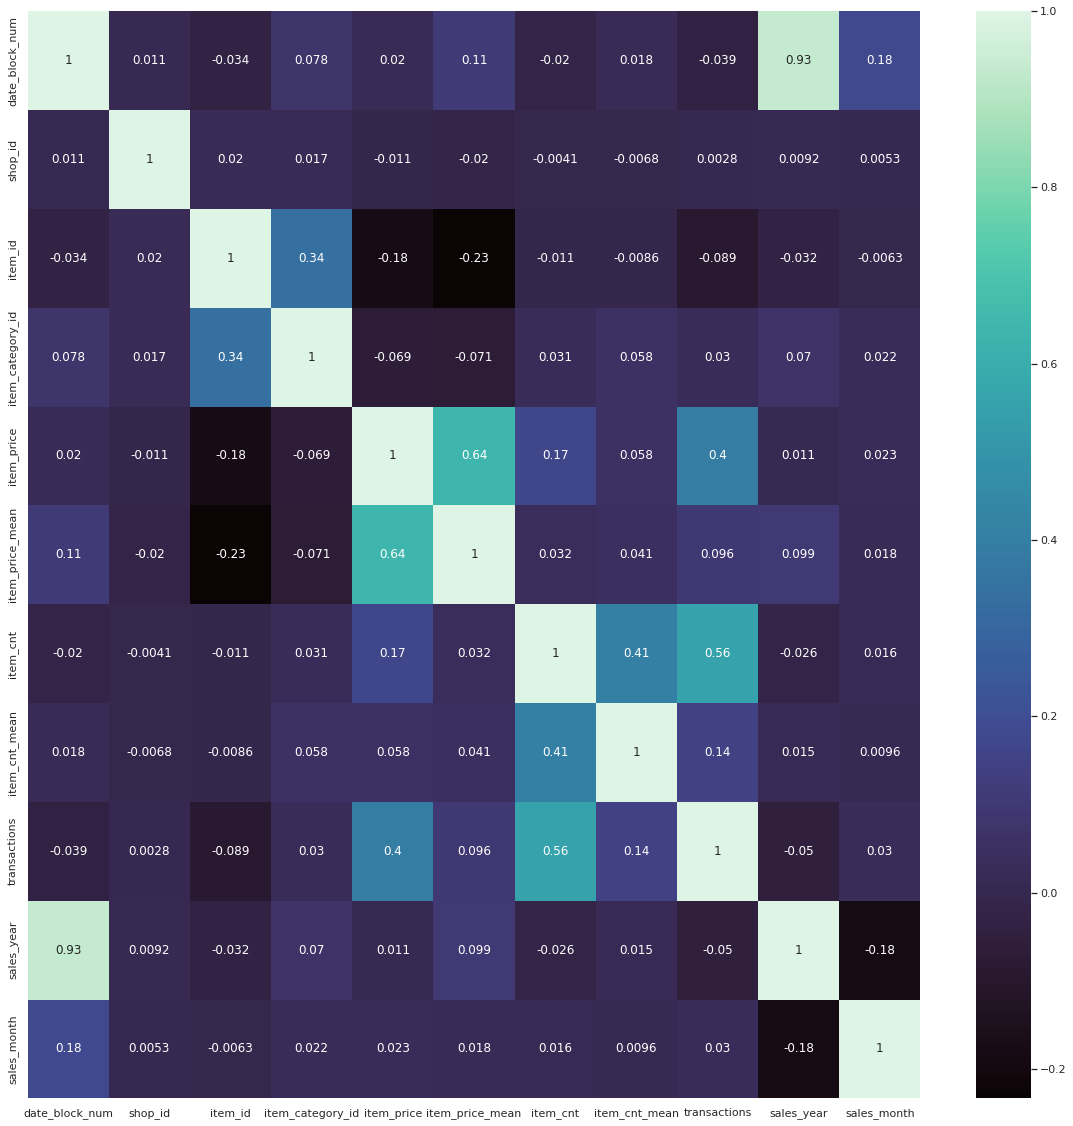

In [41]:
plt.figure(figsize=(20,20))

sns.heatmap(sales_monthly.corr(),cmap='mako',annot=True)

In [42]:
month_mean = sales_monthly.groupby(['sales_month'],as_index = False)['item_cnt'].mean()
month_sum = sales_monthly.groupby(['sales_month'],as_index = False)['item_cnt'].sum()

In [43]:
category_mean = sales_monthly.groupby(['item_category_id'],as_index = False)['item_cnt'].mean()
category_sum = sales_monthly.groupby(['item_category_id'],as_index = False)['item_cnt'].sum()

In [44]:
shop_mean = sales_monthly.groupby(['shop_id'],as_index = False)['item_cnt'].mean()
shop_sum = sales_monthly.groupby(['shop_id'],as_index = False)['item_cnt'].sum()